In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = "/content/drive/MyDrive/Dữ liệu dùng cho phân tích/Hotel Reservations.csv"
df = pd.read_csv(file_path)

In [ ]:
pd.set_option('display.expand_frame_repr', False)  # Không bị cắt ngang


# ** Tiền xử lý dữ liệu **


# **Đọc và kiểm tra bộ dữ liệu**

In [ ]:
print("5 dòng đầu tiên của dữ liệu:")
print(df.head())

5 dòng đầu tiên của dữ liệu:
  Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date market_segment_type  repeated_guest  no_of_previous_cancellations  no_of_previous_bookings_not_canceled  avg_price_per_room  no_of_special_requests booking_status
0   INN00001             2               0                     1                  2       Meal Plan 1                           0        Room_Type 1        224          2017             10             2             Offline               0                             0                                     0               65.00                       0   Not_Canceled
1   INN00002             2               0                     2                  3      Not Selected                           0        Room_Type 1          5          2018             11             6              Online               0 

In [ ]:
print("\nThông tin dữ liệu:")
print(df.info())


Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  


In [ ]:
print("\nThống kê mô tả của các biến số định lượng:")
print(df.describe())


Thống kê mô tả của các biến số định lượng:
       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  required_car_parking_space     lead_time  arrival_year  arrival_month  arrival_date  repeated_guest  no_of_previous_cancellations  no_of_previous_bookings_not_canceled  avg_price_per_room  no_of_special_requests
count  36275.000000    36275.000000          36275.000000       36275.000000                36275.000000  36275.000000  36275.000000   36275.000000  36275.000000    36275.000000                  36275.000000                          36275.000000        36275.000000            36275.000000
mean       1.844962        0.105279              0.810724           2.204300                    0.030986     85.232557   2017.820427       7.423653     15.596995        0.025637                      0.023349                              0.153411          103.423539                0.619655
std        0.518715        0.402648              0.870644           1.410905          

In [ ]:
print("\nTổng số giá trị thiếu theo cột:")
print(df.isnull().sum())


Tổng số giá trị thiếu theo cột:
Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64


# **Thống kê và mô tả**

In [ ]:
print("\nGiá trị phân bố của biến booking_status:")
print(df['booking_status'].value_counts())


Giá trị phân bố của biến booking_status:
booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64


In [ ]:
print("\nGiá trị phân bố của biến room_type_reserved:")
print(df['room_type_reserved'].value_counts())


Giá trị phân bố của biến room_type_reserved:
room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64


In [ ]:
print("\nGiá trị phân bố của biến market_segment_type:")
print(df['market_segment_type'].value_counts())


Giá trị phân bố của biến market_segment_type:
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64


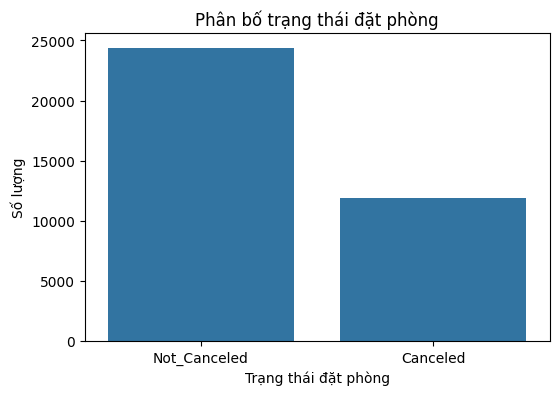

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='booking_status', data=df)
plt.title("Phân bố trạng thái đặt phòng")
plt.xlabel("Trạng thái đặt phòng")
plt.ylabel("Số lượng")
plt.show()

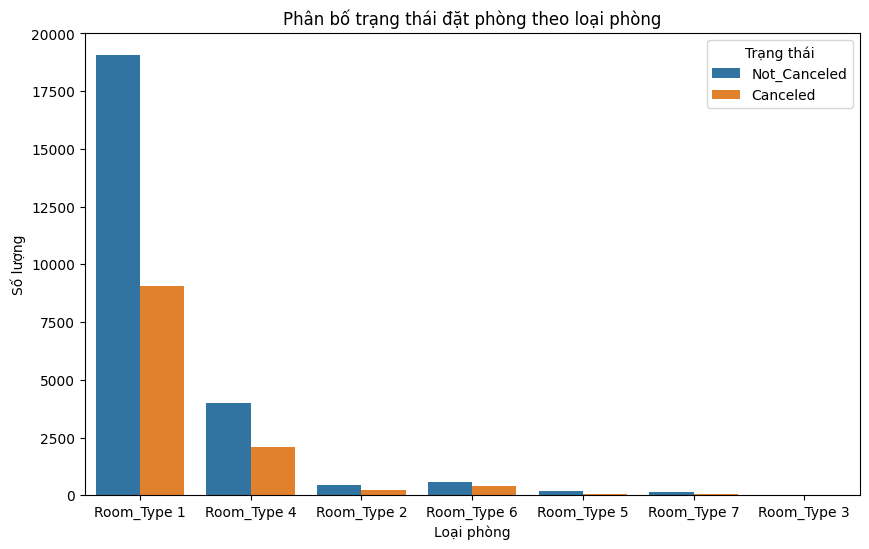

In [ ]:
# Phân bố Room Type theo trạng thái đặt phòng
plt.figure(figsize=(10,6))
sns.countplot(x='room_type_reserved', hue='booking_status', data=df)
plt.title("Phân bố trạng thái đặt phòng theo loại phòng")
plt.xlabel("Loại phòng")
plt.ylabel("Số lượng")
plt.legend(title="Trạng thái")
plt.show()

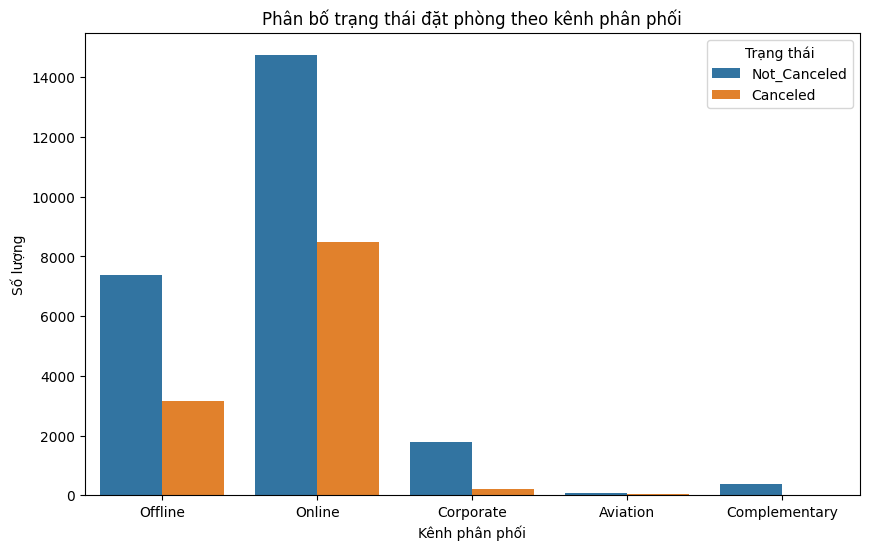

In [ ]:
# Phân bố Market Segment theo trạng thái đặt phòng
plt.figure(figsize=(10,6))
sns.countplot(x='market_segment_type', hue='booking_status', data=df)
plt.title("Phân bố trạng thái đặt phòng theo kênh phân phối")
plt.xlabel("Kênh phân phối")
plt.ylabel("Số lượng")
plt.legend(title="Trạng thái")
plt.show()

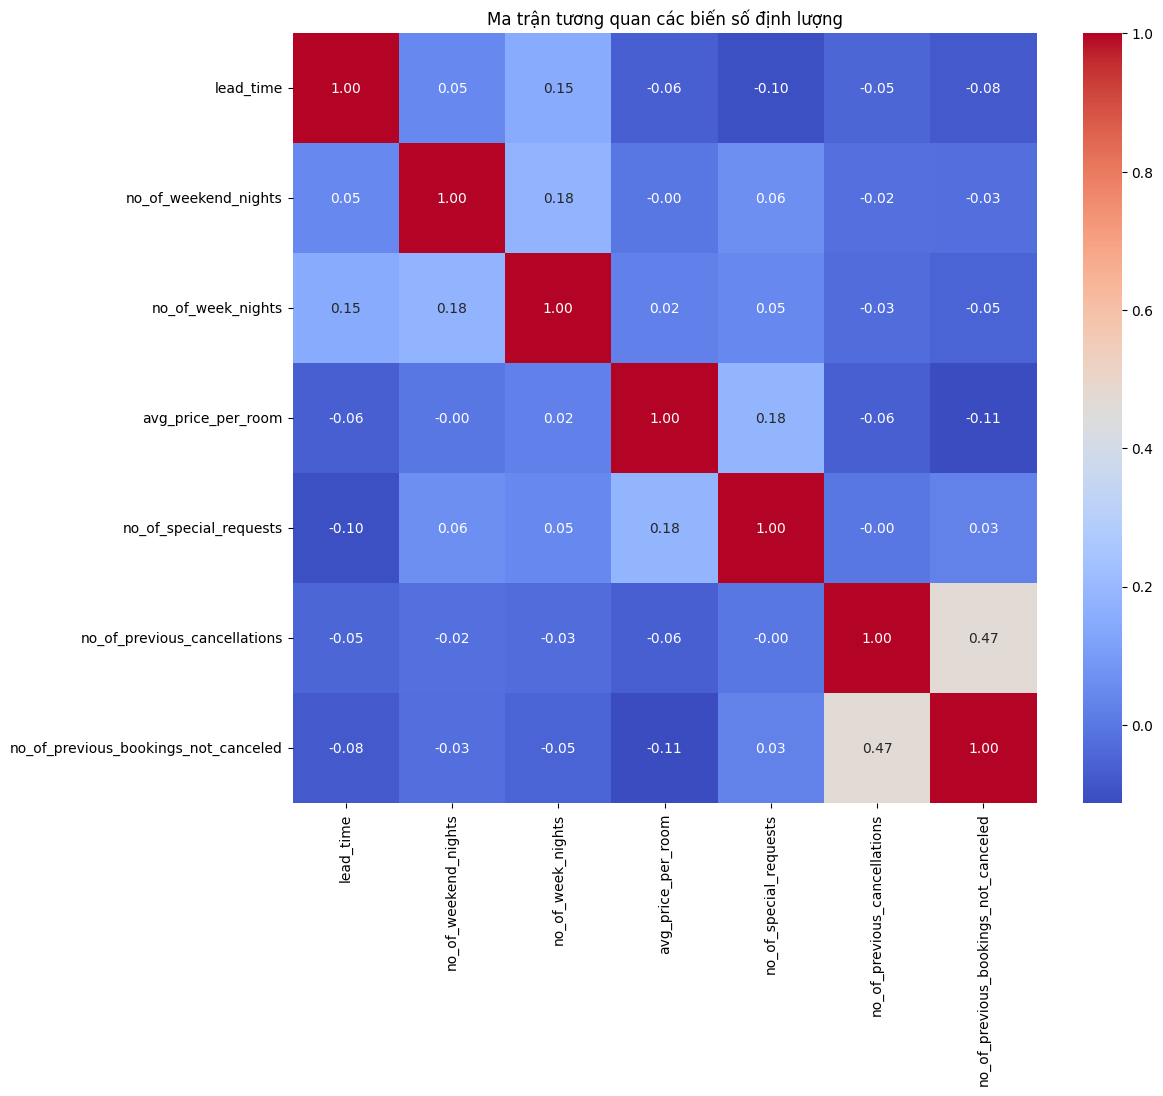

In [ ]:
plt.figure(figsize=(12,10))
corr = df[['lead_time', 'no_of_weekend_nights', 'no_of_week_nights', 'avg_price_per_room', 'no_of_special_requests', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Ma trận tương quan các biến số định lượng")
plt.show()


In [ ]:
# Điều chỉnh dữ liệu lỗi:
# Nếu năm là 2018, tháng là 2 và ngày là 29 => chuyển thành 28
condition = (df['arrival_year'] == 2018) & (df['arrival_month'] == 2) & (df['arrival_date'] == 29)
df.loc[condition, 'arrival_date'] = 28

# Gộp các cột thành 1 cột dạng date
df['arrival_date_full'] = pd.to_datetime(
    df[['arrival_year', 'arrival_month', 'arrival_date']].rename(
        columns={'arrival_year': 'year', 'arrival_month': 'month', 'arrival_date': 'day'}
    )
)

# Hiển thị kết quả
print(df[['arrival_year', 'arrival_month', 'arrival_date', 'arrival_date_full']].head(10))

   arrival_year  arrival_month  arrival_date arrival_date_full
0          2017             10             2        2017-10-02
1          2018             11             6        2018-11-06
2          2018              2            28        2018-02-28
3          2018              5            20        2018-05-20
4          2018              4            11        2018-04-11
5          2018              9            13        2018-09-13
6          2017             10            15        2017-10-15
7          2018             12            26        2018-12-26
8          2018              7             6        2018-07-06
9          2018             10            18        2018-10-18


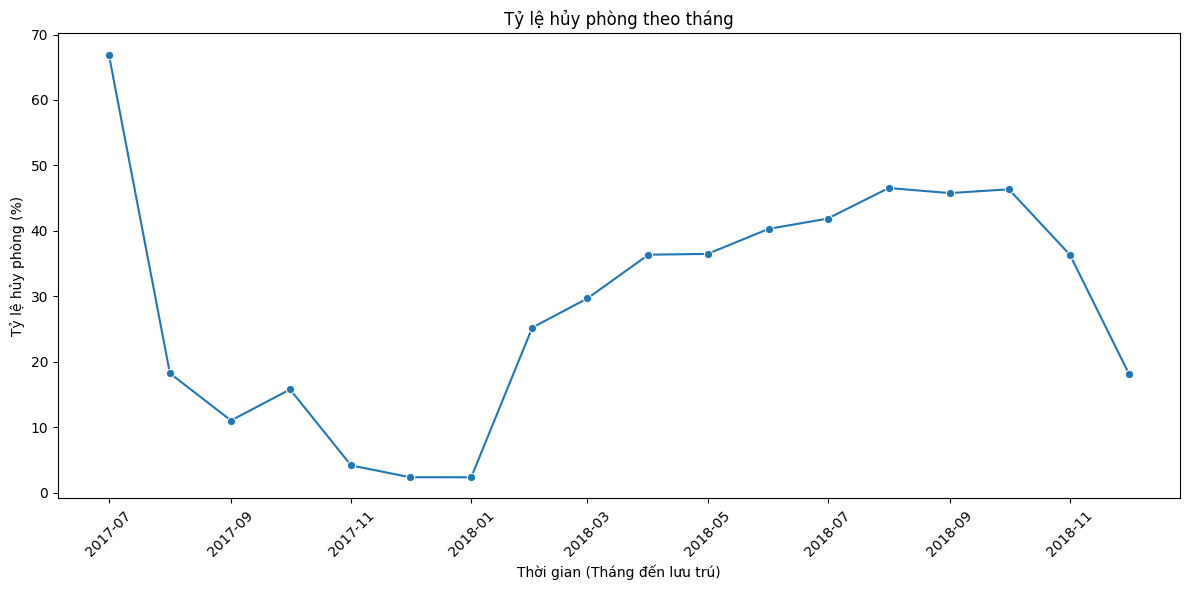

In [ ]:
# Tạo cột chỉ số hủy phòng: 1 nếu trạng thái là 'Canceled', 0 nếu không
df['is_canceled'] = df['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)

# 1. Phân tích theo tháng: Tổng số đặt phòng và tỷ lệ hủy phòng theo từng tháng lưu trú

# Chuyển đổi arrival_date_full thành khoảng thời gian theo tháng
df['arrival_month_period'] = df['arrival_date_full'].dt.to_period('M')

# Nhóm dữ liệu theo tháng và tính tổng số booking và số lần hủy
monthly_stats = df.groupby('arrival_month_period').agg(
    total_bookings = ('Booking_ID', 'count'),
    canceled_bookings = ('is_canceled', 'sum')
).reset_index()

# Tính tỷ lệ hủy phòng (%)
monthly_stats['cancellation_rate'] = (monthly_stats['canceled_bookings'] / monthly_stats['total_bookings']) * 100

# Chuyển lại Period về datetime để dễ vẽ biểu đồ
monthly_stats['arrival_month_period'] = monthly_stats['arrival_month_period'].dt.to_timestamp()

# Vẽ biểu đồ xu hướng hủy phòng theo tháng
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_month_period', y='cancellation_rate', data=monthly_stats, marker="o")
plt.title("Tỷ lệ hủy phòng theo tháng")
plt.xlabel("Thời gian (Tháng đến lưu trú)")
plt.ylabel("Tỷ lệ hủy phòng (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-33-3bdd99021a09>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='arrival_dayofweek', y='cancellation_rate', data=weekday_stats, palette='viridis')


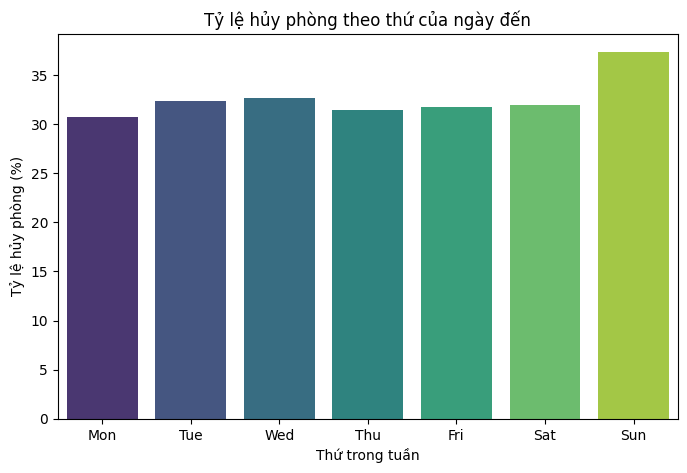

In [ ]:
# 2. Phân tích theo thứ trong tuần: Xem liệu thứ của arrival_date_full có ảnh hưởng đến tỷ lệ hủy không

# Tạo cột thứ trong tuần (0: Thứ Hai, 6: Chủ Nhật)
df['arrival_dayofweek'] = df['arrival_date_full'].dt.dayofweek

# Nhóm theo thứ trong tuần
weekday_stats = df.groupby('arrival_dayofweek').agg(
    total_bookings = ('Booking_ID', 'count'),
    canceled_bookings = ('is_canceled', 'sum')
).reset_index()

weekday_stats['cancellation_rate'] = (weekday_stats['canceled_bookings'] / weekday_stats['total_bookings']) * 100

# Đổi tên thứ cho dễ hiểu (0: Thứ Hai, 6: Chủ Nhật)
weekday_labels = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
weekday_stats['arrival_dayofweek'] = weekday_stats['arrival_dayofweek'].map(weekday_labels)

# Vẽ biểu đồ tỷ lệ hủy theo thứ trong tuần
plt.figure(figsize=(8,5))
sns.barplot(x='arrival_dayofweek', y='cancellation_rate', data=weekday_stats, palette='viridis')
plt.title("Tỷ lệ hủy phòng theo thứ của ngày đến")
plt.xlabel("Thứ trong tuần")
plt.ylabel("Tỷ lệ hủy phòng (%)")
plt.show()


In [ ]:
# 3. Một số thống kê tổng quát theo arrival_date_full

# Ví dụ: Số đặt phòng và số hủy theo từng năm
df['arrival_year'] = df['arrival_date_full'].dt.year
yearly_stats = df.groupby('arrival_year').agg(
    total_bookings = ('Booking_ID', 'count'),
    canceled_bookings = ('is_canceled', 'sum')
).reset_index()
yearly_stats['cancellation_rate'] = (yearly_stats['canceled_bookings'] / yearly_stats['total_bookings']) * 100

print("Thống kê hàng năm:")
print(yearly_stats)

Thống kê hàng năm:
   arrival_year  total_bookings  canceled_bookings  cancellation_rate
0          2017            6514                961          14.752840
1          2018           29761              10924          36.705756


# Sử dụng thuật toán Random Forest - lựa chọn đánh giá mô hình nào cho chính xác -
